In [51]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Paso 1: Inspeccionamos el Dataset, para estudiar la mejor forma de cargarlo

In [44]:
with open('../Data/dataset_SCL.csv') as file:
    n_rows = len(file.readlines())
print (f'Numero de Filas: {n_rows}')

Numero de Filas: 68207


* Con 68 mil filas el dataset facilmente cabe directamente en memoria y no requiere de procesamiento adicional
* Se carga estandarizando las columnas con valores mixtos y fechas

In [14]:
data_vuelos = pd.read_csv('../Data/dataset_SCL.csv', dtype= {'Vlo-I':str, 'Vlo-O':str}, parse_dates=['Fecha-I', 'Fecha-O'])
matriz_vuelos = data_vuelos.copy()

In [45]:
matriz_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Fecha-I         68206 non-null  datetime64[ns] 
 1   Vlo-I           68206 non-null  object         
 2   Ori-I           68206 non-null  object         
 3   Des-I           68206 non-null  object         
 4   Emp-I           68206 non-null  object         
 5   Fecha-O         68206 non-null  datetime64[ns] 
 6   Vlo-O           68205 non-null  object         
 7   Ori-O           68206 non-null  object         
 8   Des-O           68206 non-null  object         
 9   Emp-O           68206 non-null  object         
 10  DIA             68206 non-null  int64          
 11  MES             68206 non-null  int64          
 12  AÑO             68206 non-null  int64          
 13  DIANOM          68206 non-null  object         
 14  TIPOVUELO       68206 non-null  object

In [46]:
for col in matriz_vuelos:
    print(f'Columna: {col}, Valores Unicos:{len(matriz_vuelos[col].unique())}')

Columna: Fecha-I, Valores Unicos:53252
Columna: Vlo-I, Valores Unicos:584
Columna: Ori-I, Valores Unicos:1
Columna: Des-I, Valores Unicos:64
Columna: Emp-I, Valores Unicos:30
Columna: Fecha-O, Valores Unicos:62774
Columna: Vlo-O, Valores Unicos:862
Columna: Ori-O, Valores Unicos:1
Columna: Des-O, Valores Unicos:63
Columna: Emp-O, Valores Unicos:32
Columna: DIA, Valores Unicos:31
Columna: MES, Valores Unicos:12
Columna: AÑO, Valores Unicos:2
Columna: DIANOM, Valores Unicos:7
Columna: TIPOVUELO, Valores Unicos:2
Columna: OPERA, Valores Unicos:23
Columna: SIGLAORI, Valores Unicos:1
Columna: SIGLADES, Valores Unicos:62
Columna: dif_min, Valores Unicos:176
Columna: temporada_alta, Valores Unicos:2
Columna: atraso_15, Valores Unicos:2
Columna: periodo_dia, Valores Unicos:4


* Como toda la data es de tipo objeto, es realmente dificil realizar un analisis a priori a menos que se generen features que entreguen mas informacion al respecto de la pregunta de negocio en cuestion (atrasos), solo se pueden ver histogramas, rangos, aerolineas, y destinos (Origen es unico) 
* Las columnas de fecha estan con marca de tiempo por lo que es probable que existan muchos valores unicos

### Paso 2 : Analisis de distribucion simple

#### Aerolineas

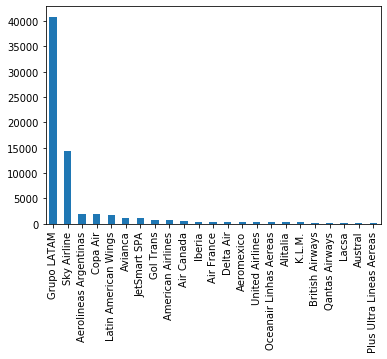

In [48]:
matriz_vuelos.OPERA.value_counts().plot.bar()

* Existen 2 Aerolineas sobrereprenentadas en el dataset; LATAM y Sky. Esto implica que el nombre del operador sera una feature complicada en analisis, por lo que se recomienda estratificarla o no usarla.

#### Destinos

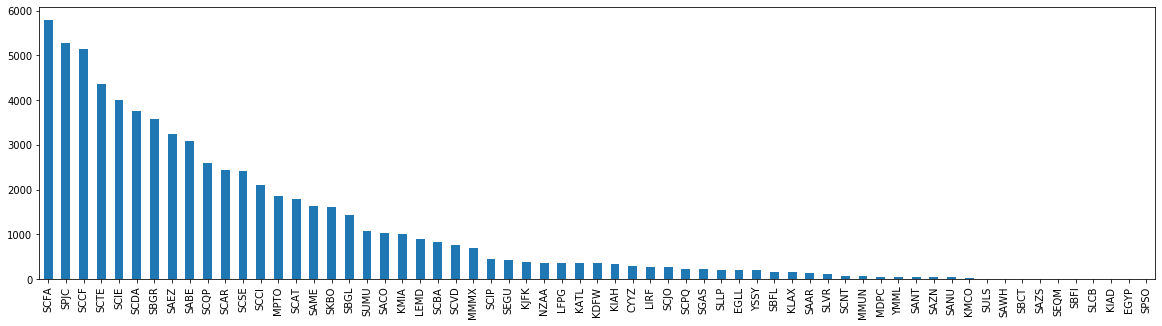

In [56]:
plt.figure(figsize=(20,5))
matriz_vuelos['Des-O'].value_counts().plot.bar()

* En caso de los destinos la data se encuentra un poco mejor distribuida, sin embargo, se descartaran aquellos destinos que tengan menos de 10 viajes por razones practicas.

### Paso 3: Creacion de Features Adicionales

#### Temporada

In [15]:
t_alta1 = pd.date_range(start='01/01/2017', end='3/03/2017') 
t_alta2 = pd.date_range(start='07/15/2017', end='07/31/2017') 
t_alta3 = pd.date_range(start='9/11/2017', end='09/30/2017')
t_alta4 = pd.date_range(start='12/15/2017', end='01/01/2018')
t_alta = t_alta1.append([t_alta2, t_alta3, t_alta4])

In [17]:
matriz_vuelos['temporada_alta'] = pd.to_datetime(matriz_vuelos['Fecha-I']).apply(lambda x: 1 if x.strftime('%m/%d/%Y') in t_alta else 0)

#### Diferencia horaria en minutos

In [ ]:
matriz_vuelos['dif_min']=matriz_vuelos['Fecha-O']-matriz_vuelos['Fecha-I']

#### Marcador de atraso 15 minutos

In [30]:
matriz_vuelos['atraso_15'] = matriz_vuelos['dif_min'].apply(lambda x: 1 if x>dt.timedelta(minutes=15) else 0)

#### Marcador Periodo del Dia

In [35]:
def periodo_dia(hora:int)->str:
    if(5<hora<12):
        return 'mañana'
    elif(12<hora<19):
        return 'tarde'
    elif(hora>19 or hora<5):
        return 'noche'

In [40]:
matriz_vuelos['periodo_dia']= matriz_vuelos['Fecha-I'].apply(lambda x: periodo_dia(x.hour))

In [57]:
matriz_vuelos.to_csv('../Data/synthetic_features.csv')

### Paso 4: Analisis de Correlacion y Agrupaciones

##### Hipotesis adicionales: 
* Existe una relacion entre una discordancia en los origenes/destinos y atrasos?

### Paso 5 Modelado base

### Paso 6: Monitoreo y recomendacion

### Conclusion